## Research Question: What mostly occurring programming languages do developers ask ChatGPT to rectify their bugs and solve their issues in?

### Name: Roochita Ikkurthy
### Pin: RI23B

### Data Acquisition

In [63]:
import json
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')  # Download the punkt tokenizer if not already downloaded

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
file1_path = '20231012_230826_commit_sharings.json'
data = pd.read_json(file1_path)
df1 = [
    pd.json_normalize(sharing, record_path='Conversations')
    .assign(
        RepoLanguage=item.get('RepoLanguage', None),
        Title=sharing.get('Title', None)
    )
    for item in data['Sources']
    if 'ChatgptSharing' in item
    for sharing in item['ChatgptSharing']
    if 'Conversations' in sharing
]

df = pd.concat(df1, ignore_index=True)

commit_sharing = df[['RepoLanguage', 'Title', 'Prompt']]
commit_sharing

,RepoLanguage,Title,Prompt
0,HTML,Adjust Button for Keyboard,このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...
1,HTML,"I am ChatGPT, a language model AI developed by...",このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...
2,HTML,Refactor HTML and JavaScript,refactor this code.\n\n<!DOCTYPE html>\n<html>...
3,CSS,Server Code Organization,server.js\n// Required libraries\nimport cors ...
4,CSS,Server Code Organization,"package.json\n{\n ""name"": ""mindfulai"",\n ""ve..."
...,...,...,...
1597,HTML,Module Error in Browser.,FAIL ./game.test.js\n ● Test suite failed t...
1598,HTML,Module Error in Browser.,FAIL ./game.test.js\n ✕ check if startPlayi...
1599,HTML,Module Error in Browser.,we never changed index.html
1600,HTML,Module Error in Browser.,why am i back to inlining javascript


In [65]:
file2_path = '20231012_235320_discussion_sharings.json'
data = pd.read_json(file2_path)
df1 = [
    pd.json_normalize(sharing, record_path='Conversations')
    .assign(
        RepoLanguage=item.get('RepoLanguage', None),
        Title=sharing.get('Title', None)
    )
    for item in data['Sources']
    if 'ChatgptSharing' in item
    for sharing in item['ChatgptSharing']
    if 'Conversations' in sharing
]

df = pd.concat(df1, ignore_index=True)

discussion_sharing = df[['RepoLanguage', 'Title', 'Prompt']]
discussion_sharing

,RepoLanguage,Title,Prompt
0,Jupyter Notebook,ONNX Model Visualization Tools,什么是ONNX模型？我是一名新生，您是世界上最好的老师，也是最优秀的工程师和研究人员。能否指...
1,Jupyter Notebook,ONNX Model Visualization Tools,那他们和torch tensorflow的区别在哪里呢
2,Jupyter Notebook,ONNX Model Visualization Tools,他们都是图结构的吗
3,TypeScript,Vue 3 List Watch,I have a vue 3 application. I have a ref const...
4,None,跨界与守界的屠呦呦,使以下文章更有逻辑性\n\n屠呦呦究竟是跨界者还是守界者\n\n时光如白驹过隙，社会百态瞬息...
...,...,...,...
218,HTML,Create Nested Directories Command,received this error code when verifying the st...
219,HTML,Create Nested Directories Command,now create a how to use the command line to cr...
220,HTML,Create Nested Directories Command,the echo command is not working
221,HTML,Create Nested Directories Command,the echo command is still not working on windo...


In [66]:
file3_path = '20231012_235128_issue_sharings.json'
data = pd.read_json(file3_path)
df1 = [
    pd.json_normalize(sharing, record_path='Conversations')
    .assign(
        RepoLanguage=item.get('RepoLanguage', None),
        Title=sharing.get('Title', None)
    )
    for item in data['Sources']
    if 'ChatgptSharing' in item
    for sharing in item['ChatgptSharing']
    if 'Conversations' in sharing
]

df = pd.concat(df1, ignore_index=True)

issue_sharing = df[['RepoLanguage', 'Title', 'Prompt']]
issue_sharing

,RepoLanguage,Title,Prompt
0,None,Raspberry Pi Wi-Fi診断,Raspberry Piをアクセスポイント化させて、Wi-Fi通信をスマホとさせました。Ra...
1,None,Raspberry Pi Wi-Fi診断,Raspberry Piには地図タイルが入っており、これをWi−Fi通信でスマホに配信します...
2,None,Raspberry Pi Wi-Fi診断,上記で教えてくれたコマンドはsshでラズパイの中に入って打つっていう認識でよいよね？
3,None,iperfコマンドの説明,iperfってどんなコマンドですか？中学生にもわかるように説明して
4,None,iperfコマンドの説明,どういった出力結果がでる？
...,...,...,...
2027,Jupyter Notebook,Rewriting FSRS Tutorial,continue
2028,Jupyter Notebook,Rewriting FSRS Tutorial,proceed
2029,TypeScript,TypeScript: No Checked Exceptions,I wish that in typescript I could mark a funct...
2030,TypeScript,TypeScript: No Checked Exceptions,Are there no other options that use static ana...


In [67]:
file4_path = '20231012_234250_file_sharings.json'
data = pd.read_json(file3_path)
df1 = [
    pd.json_normalize(sharing, record_path='Conversations')
    .assign(
        RepoLanguage=item.get('RepoLanguage', None),
        Title=sharing.get('Title', None)
    )
    for item in data['Sources']
    if 'ChatgptSharing' in item
    for sharing in item['ChatgptSharing']
    if 'Conversations' in sharing
]

df = pd.concat(df1, ignore_index=True)

file_sharing = df[['RepoLanguage', 'Title', 'Prompt']]
file_sharing

,RepoLanguage,Title,Prompt
0,None,Raspberry Pi Wi-Fi診断,Raspberry Piをアクセスポイント化させて、Wi-Fi通信をスマホとさせました。Ra...
1,None,Raspberry Pi Wi-Fi診断,Raspberry Piには地図タイルが入っており、これをWi−Fi通信でスマホに配信します...
2,None,Raspberry Pi Wi-Fi診断,上記で教えてくれたコマンドはsshでラズパイの中に入って打つっていう認識でよいよね？
3,None,iperfコマンドの説明,iperfってどんなコマンドですか？中学生にもわかるように説明して
4,None,iperfコマンドの説明,どういった出力結果がでる？
...,...,...,...
2027,Jupyter Notebook,Rewriting FSRS Tutorial,continue
2028,Jupyter Notebook,Rewriting FSRS Tutorial,proceed
2029,TypeScript,TypeScript: No Checked Exceptions,I wish that in typescript I could mark a funct...
2030,TypeScript,TypeScript: No Checked Exceptions,Are there no other options that use static ana...


In [68]:
file5_path = '20231012_233628_pr_sharings.json'
data = pd.read_json(file5_path)
df1 = [
    pd.json_normalize(sharing, record_path='Conversations')
    .assign(
        RepoLanguage=item.get('RepoLanguage', None),
        Title=sharing.get('Title', None)
    )
    for item in data['Sources']
    if 'ChatgptSharing' in item
    for sharing in item['ChatgptSharing']
    if 'Conversations' in sharing
]

df = pd.concat(df1, ignore_index=True)

pr_sharing = df[['RepoLanguage', 'Title', 'Prompt']]
pr_sharing

,RepoLanguage,Title,Prompt
0,JavaScript,Regex Testing Assistance,can u be my regex tester
1,JavaScript,Regex Testing Assistance,/^(\+?98[\-\s]?|0)9[0-39]\d[\-\s]?\d{3}[\-\s]?...
2,JavaScript,Imperative vs Declarative Programming,Explain the difference between imperative and ...
3,TypeScript,Avoid Prototype Chain Issue,I have this code:\n\nconst characterMap: Chara...
4,Go,Empty String in Base64,"Hello ChatGPT, do you know if an empty string ..."
...,...,...,...
991,C++,Understanding Grid Size Calculation,what would be a good name for this test?
992,C++,用語の選択,こちらの変更に対して、\n\n- /// 与えられたパスからモデルを取得する\n+ ...
993,C++,Mutating Properties in Rust,Here is some rust code:\n\n```\nlet conn =\n ...
994,C++,Rustでのデフォルト関数,この2つの処理は一緒でしょうか？\n\nconst convertHankakuToZenk...


### Combining 5 files into one - final_df

In [69]:
final_df = pd.concat([commit_sharing, discussion_sharing, issue_sharing, file_sharing, pr_sharing])

In [70]:
final_df

,RepoLanguage,Title,Prompt
0,HTML,Adjust Button for Keyboard,このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...
1,HTML,"I am ChatGPT, a language model AI developed by...",このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...
2,HTML,Refactor HTML and JavaScript,refactor this code.\n\n<!DOCTYPE html>\n<html>...
3,CSS,Server Code Organization,server.js\n// Required libraries\nimport cors ...
4,CSS,Server Code Organization,"package.json\n{\n ""name"": ""mindfulai"",\n ""ve..."
...,...,...,...
991,C++,Understanding Grid Size Calculation,what would be a good name for this test?
992,C++,用語の選択,こちらの変更に対して、\n\n- /// 与えられたパスからモデルを取得する\n+ ...
993,C++,Mutating Properties in Rust,Here is some rust code:\n\n```\nlet conn =\n ...
994,C++,Rustでのデフォルト関数,この2つの処理は一緒でしょうか？\n\nconst convertHankakuToZenk...


### Cleaning the data

In [71]:
final_df.shape

(6885, 3)

In [72]:
final_df.columns

Index(['RepoLanguage', 'Title', 'Prompt'], dtype='object')

In [73]:
null_values = final_df[final_df.isna().any(axis = 1)]


In [74]:
all_nan_rows = final_df[final_df.isna().all(axis = 1)]
all_nan_rows

,RepoLanguage,Title,Prompt


In [75]:
# Checking out NaN values in the dataset
# Found around 600 records
nan_rows = final_df[final_df.isna().sum(axis=1) == 1]
nan_rows

,RepoLanguage,Title,Prompt
23,None,قمصان لاعبي كرة القدم,اصنع لي html بقمصان لاعبين الكرة المشهورين
28,None,Create SQLite DB Packages,Write a function that can return the long desc...
29,None,Create SQLite DB Packages,Yes
30,None,Create SQLite DB Packages,Use the file to visualize the trends in length...
31,None,Create SQLite DB Packages,Go
...,...,...,...
6,None,Interpret SVG Path Syntax,Can you interpret this SVG path syntax? <path ...
7,None,Interpret SVG Path Syntax,This is supposed to be within a 100x100 viewbo...
86,None,GitHub Pages with PlantUML,I want to create a GitHub Action to turn my Ma...
347,None,Spotify Auth Flows,What is the difference between SpotifyClientCr...


In [76]:
# dropping those NaN records, but saving the records first.
final_df1 = final_df.copy()
final_df1.dropna(inplace = True)

In [77]:
final_df1

,RepoLanguage,Title,Prompt
0,HTML,Adjust Button for Keyboard,このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...
1,HTML,"I am ChatGPT, a language model AI developed by...",このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...
2,HTML,Refactor HTML and JavaScript,refactor this code.\n\n<!DOCTYPE html>\n<html>...
3,CSS,Server Code Organization,server.js\n// Required libraries\nimport cors ...
4,CSS,Server Code Organization,"package.json\n{\n ""name"": ""mindfulai"",\n ""ve..."
...,...,...,...
991,C++,Understanding Grid Size Calculation,what would be a good name for this test?
992,C++,用語の選択,こちらの変更に対して、\n\n- /// 与えられたパスからモデルを取得する\n+ ...
993,C++,Mutating Properties in Rust,Here is some rust code:\n\n```\nlet conn =\n ...
994,C++,Rustでのデフォルト関数,この2つの処理は一緒でしょうか？\n\nconst convertHankakuToZenk...


In [94]:
# categorizing the bugs, features and errors using nltk
def categorize_prompt(prompt):
    prompt = prompt.lower()
    categories = {
        "Bugs": ["error", "problem", "bug", "issue"],
        "Features": ["feature", "enhancement", "add", "improve", "Optimize"],
        "Errors": ["failed", "crash", "exception", "error message"],
        "Test": ["test", "check", "compare", "affect"]
    }

    tokens = word_tokenize(prompt)

    for category, keywords in categories.items():
        if any(keyword in tokens for keyword in keywords):
            return category
    return "Other"

# Apply the categorize_prompt function using a lambda function
final_df1['Category'] = final_df1['Prompt'].apply(lambda x: categorize_prompt(x))

# Print the DataFrame with the added 'Category' column
print(final_df1.head())

extracted_data = pd.DataFrame(final_df1)
extracted_data.head(40)

  RepoLanguage                                              Title  \
0         HTML                         Adjust Button for Keyboard   
1         HTML  I am ChatGPT, a language model AI developed by...   
2         HTML                       Refactor HTML and JavaScript   
3          CSS                           Server Code Organization   
4          CSS                           Server Code Organization   

                                              Prompt Category  
0  このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...    Other  
1  このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...    Other  
2  refactor this code.\n\n<!DOCTYPE html>\n<html>...    Other  
3  server.js\n// Required libraries\nimport cors ...     Bugs  
4  package.json\n{\n  "name": "mindfulai",\n  "ve...     Bugs  


,RepoLanguage,Title,Prompt,Category
0,HTML,Adjust Button for Keyboard,このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...,Other
1,HTML,"I am ChatGPT, a language model AI developed by...",このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...,Other
2,HTML,Refactor HTML and JavaScript,refactor this code.\n\n<!DOCTYPE html>\n<html>...,Other
3,CSS,Server Code Organization,server.js\n// Required libraries\nimport cors ...,Bugs
4,CSS,Server Code Organization,"package.json\n{\n ""name"": ""mindfulai"",\n ""ve...",Bugs
5,CSS,Server Code Organization,\n/home/bitnami/.pm2/logs/Mindful-AI-out-0.log...,Bugs
6,CSS,Server Code Organization,\n/home/bitnami/.pm2/logs/Mindful-AI-out-0.log...,Bugs
7,CSS,Server Code Organization,\nimport PromptGPT from './PromptGPT.js';\nexp...,Other
8,JavaScript,FetchBook CLI - Manage HTTP,write a readme file for this cli:\n\nimport { ...,Other
9,JavaScript,FetchBook CLI - Manage HTTP,story files are esm modules that must comply w...,Other


### More Analysis-Understanding the data

In [96]:
# Finding out the unique values of RepoLanguage
extracted_data["RepoLanguage"].unique()

array(['HTML', 'CSS', 'JavaScript', 'Python', 'Batchfile', 'Lua', 'Jinja',
       'Shell', 'Java', 'C', 'Dockerfile', 'C#', 'Pascal', 'Go', 'EJS',
       'GAML', 'Cython', 'Jupyter Notebook', 'TypeScript', 'Ruby',
       'Emacs Lisp', 'PHP', 'SystemVerilog', 'Rust', 'C++', 'Solidity',
       'Kotlin', 'Swift', 'Verilog', 'Clojure', 'Vue', 'Perl',
       'Game Maker Language', 'Astro', 'Zig', 'GLSL', 'Objective-C',
       'PowerShell', 'Makefile', 'TeX', 'R', 'Groovy', 'F#', 'PLpgSQL',
       'Nim', 'Dart', 'MDX'], dtype=object)

In [101]:
# Count of categories in 'RepoLanguage' column
prog_lang_counts = extracted_data['RepoLanguage'].value_counts()
print(prog_lang_counts)

Python                 1813
CSS                    1132
TypeScript              599
C++                     505
JavaScript              377
Java                    352
HTML                    276
PHP                     190
C                       154
Jupyter Notebook        118
Shell                   102
Rust                     97
Go                       64
C#                       63
Swift                    56
Dockerfile               54
Kotlin                   54
Vue                      51
Cython                   48
Pascal                   25
Zig                      24
Lua                      22
Ruby                     14
Game Maker Language      12
R                        10
PLpgSQL                   8
Dart                      8
Perl                      8
Batchfile                 7
TeX                       6
PowerShell                6
Objective-C               6
SystemVerilog             5
Emacs Lisp                5
Clojure                   4
F#                  

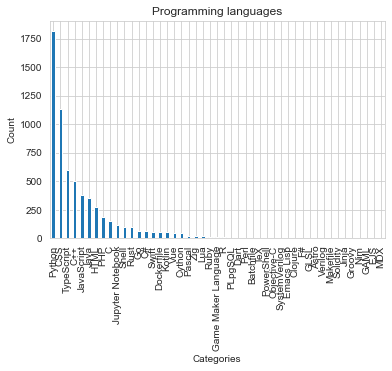

In [103]:
import matplotlib.pyplot as plt
prog_lang_counts.plot(kind='bar')

# Customize the plot
plt.title('Programming languages')
plt.xlabel('Categories')
plt.ylabel('Count')

# Show the plot
plt.show()

In [102]:
# Count of categories in the 'Category' column
category_counts = extracted_data['Category'].value_counts()
print(category_counts)

Other       4542
Bugs         825
Features     655
Test         178
Errors        97
Name: Category, dtype: int64


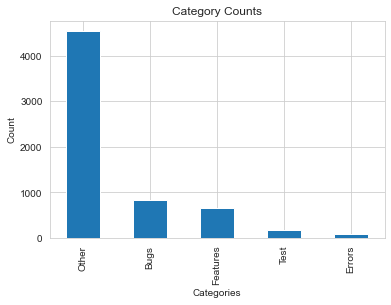

In [104]:
category_counts.plot(kind='bar')

# Customize the plot
plt.title('Category Counts')
plt.xlabel('Categories')
plt.ylabel('Count')

# Show the plot
plt.show()

In [105]:
extracted_copy = extracted_data.copy()
extracted_copy.drop(['Title', 'Prompt'], axis = 1, inplace = False)

,RepoLanguage,Category
0,HTML,Other
1,HTML,Other
2,HTML,Other
3,CSS,Bugs
4,CSS,Bugs
...,...,...
991,C++,Test
992,C++,Other
993,C++,Other
994,C++,Other


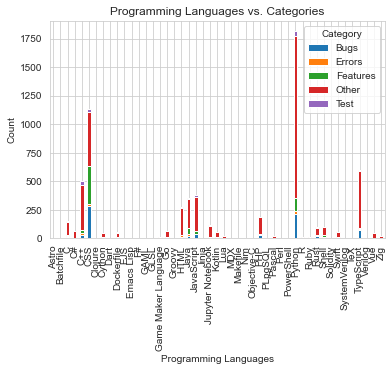

In [107]:
# Grouping data
grouped_data = extracted_copy.groupby(['RepoLanguage', 'Category']).size().unstack().fillna(0)

# Plotting
ax = grouped_data.plot(kind='bar', stacked=True)
plt.title('Programming Languages vs. Categories')
plt.xlabel('Programming Languages')
plt.ylabel('Count')
plt.show()
